In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Train Data Import

## Importing CSV

In [3]:
train_data_verbose_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/Labeled_Data/Power/experimental_stuff/train_data_labeled_underperformance_binary_post2014.csv')
train_data_verbose_df

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,Malachi Flynn,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,Ty Jerome,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,Admiral Schofield,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,Marcus Paige,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Cameron Johnson,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,DeAndre' Bembry,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,Markel Brown,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,Jaron Blossomgame,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


In [4]:
train_data_verbose_df.isnull().sum()

Player Name    0
FG             0
FGA            0
FG%            0
2P             0
2PA            0
2P%            0
3P             0
3PA            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
TS%            0
eFG%           0
3PAr           0
FTr            0
Label          0
dtype: int64

## Imputing Missing Features

In [5]:
train_data_verbose_df_imputed = train_data_verbose_df.fillna(train_data_verbose_df.median())
train_data_verbose_df_imputed

<ipython-input-5-9437d93a5c5f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_verbose_df_imputed = train_data_verbose_df.fillna(train_data_verbose_df.median())


,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,Malachi Flynn,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,Ty Jerome,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,Admiral Schofield,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,Marcus Paige,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Cameron Johnson,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,DeAndre' Bembry,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,Markel Brown,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,Jaron Blossomgame,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


## Dropping Player Name


In [6]:
train_data_verbose_df_imputed = train_data_verbose_df_imputed.drop(['Player Name'], axis=1)
train_data_verbose_df_imputed

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,3.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,2.5,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,2.5,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,2.3,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,2.7,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,5.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,4.9,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,5.7,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,5.1,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


## Preprocess Features Matrix (X) and target vector (y)

In [7]:
X = train_data_verbose_df_imputed.drop(['Label'], axis=1).to_numpy()
y = train_data_verbose_df_imputed['Label'].to_numpy()

## Printing Correlation Matrix

<Axes: >

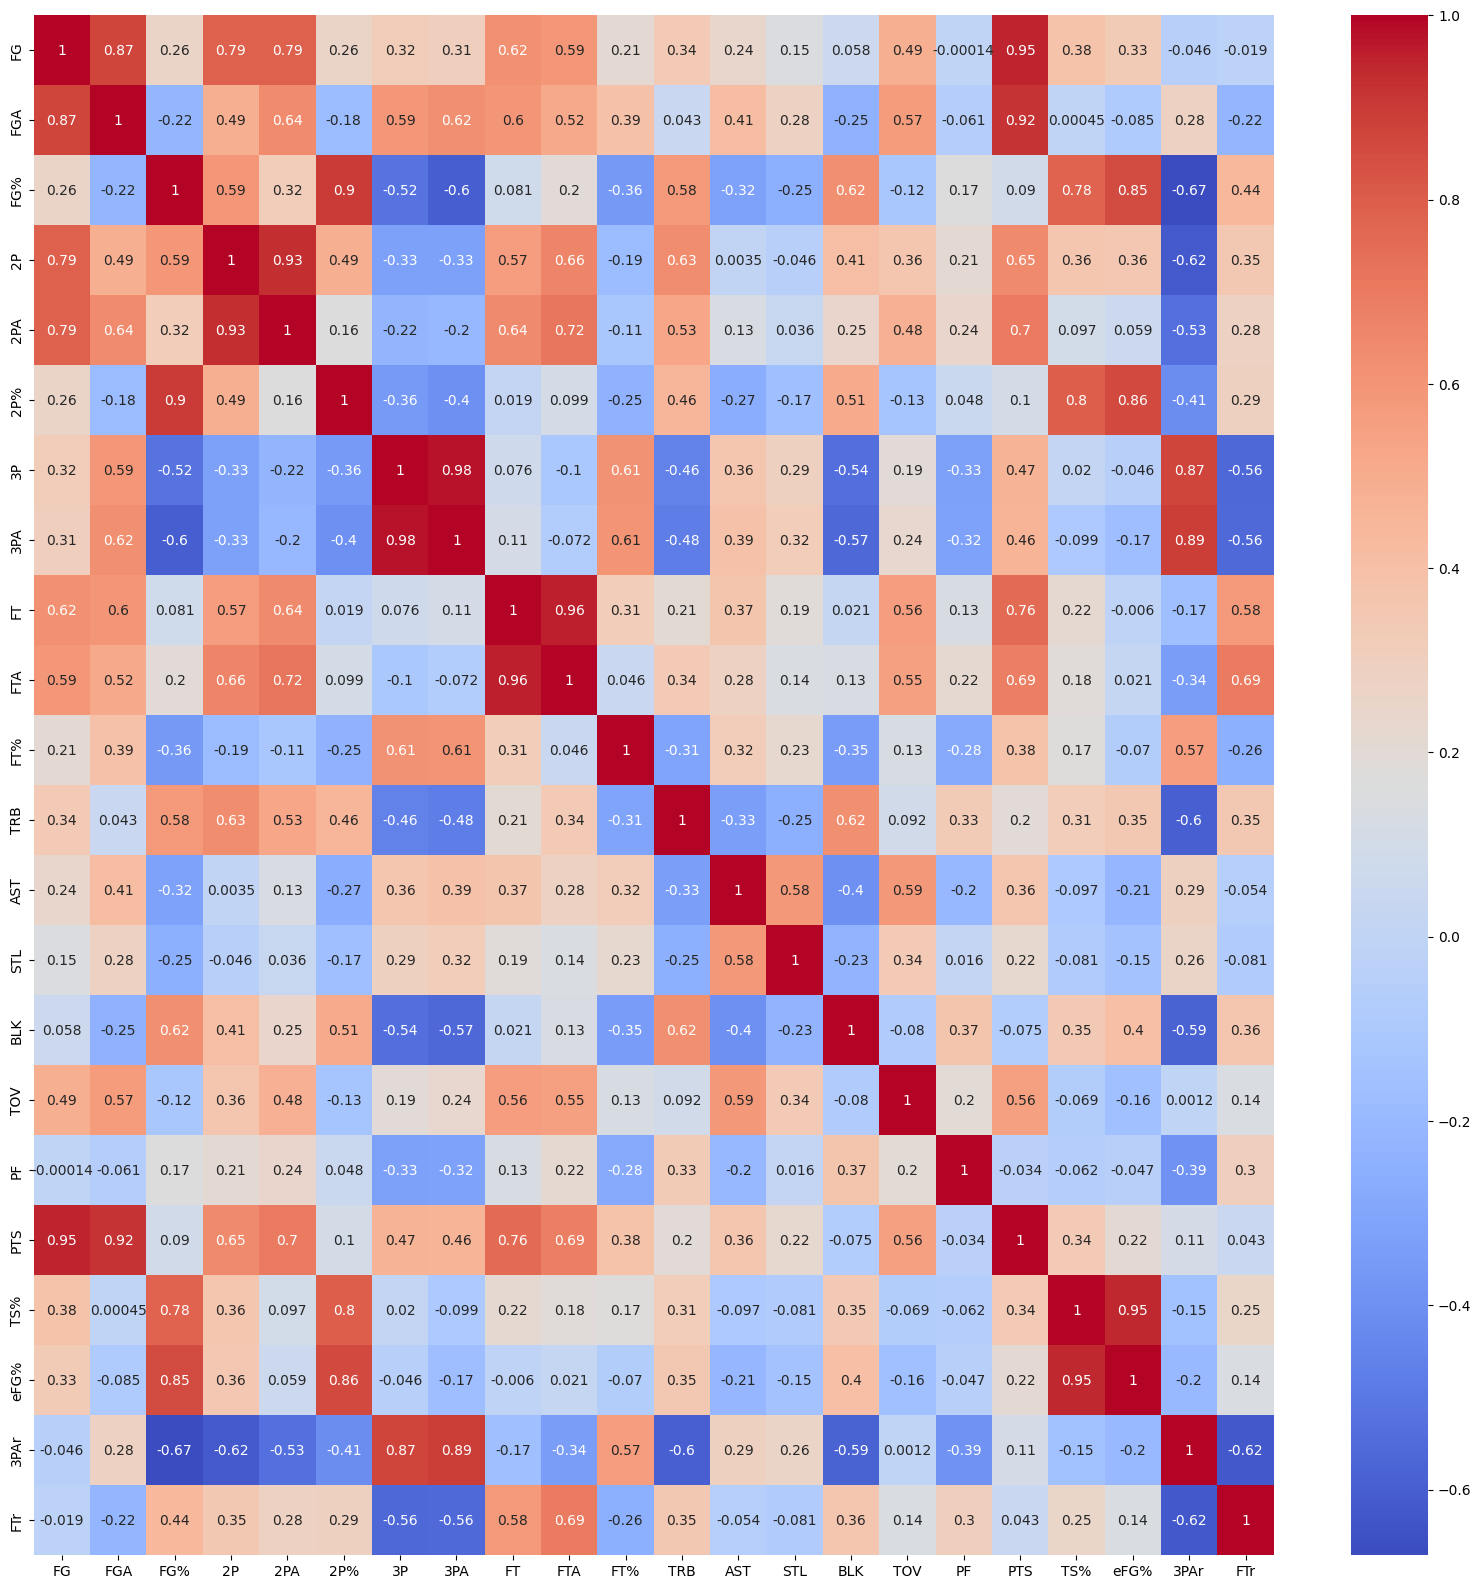

In [8]:
# create correlation matrix
corr_matrix = train_data_verbose_df_imputed.drop(['Label'], axis=1).corr()

plt.figure(figsize=(20,20))

# create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Test Data Import

## Importing CSV

In [9]:
test_data_verbose_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/Labeled_Data/Power/experimental_stuff/test_data_labeled_underperformance_binary_post2014.csv')
test_data_verbose_df

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,Lamar Patterson,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,Grant Riller,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Monte Morris,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,OG Anunoby,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,Josh Christopher,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


In [10]:
test_data_verbose_df.isnull().sum()

Player Name    0
FG             0
FGA            0
FG%            0
2P             0
2PA            0
2P%            0
3P             0
3PA            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            1
PF             1
PTS            0
TS%            0
eFG%           0
3PAr           0
FTr            0
Label          0
dtype: int64

## Imputing Missing Features

In [11]:
test_data_verbose_df_imputed = test_data_verbose_df.fillna(test_data_verbose_df.median())
test_data_verbose_df_imputed

<ipython-input-11-935c761ca987>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data_verbose_df_imputed = test_data_verbose_df.fillna(test_data_verbose_df.median())


,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,Lamar Patterson,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,Grant Riller,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Monte Morris,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,OG Anunoby,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,Josh Christopher,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


## Dropping Player Name


In [12]:
test_data_verbose_df_imputed = test_data_verbose_df_imputed.drop(['Player Name'], axis=1)
test_data_verbose_df_imputed

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,4.1,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,4.9,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,7.6,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,6.9,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,4.2,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,3.2,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,3.0,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,4.2,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,3.7,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


## Preprocess Features Matrix (X) and target vector (y)

In [13]:
X_test = test_data_verbose_df_imputed.drop(['Label'], axis=1).to_numpy()
y_test = test_data_verbose_df_imputed['Label'].to_numpy()

# Applying Deep Learning to NCAA Dataset

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers.experimental import AdamW

## Cross Validate MLP 



Training on Fold 1/3
Epoch 1/500
15/15 [==============================] - 5s 128ms/step - loss: 4.6049 - auc: 0.2597 - val_loss: 4.4249 - val_auc: 0.3775
Epoch 2/500
15/15 [==============================] - 0s 20ms/step - loss: 4.5770 - auc: 0.2321 - val_loss: 4.3664 - val_auc: 0.3679
Epoch 3/500
15/15 [==============================] - 0s 20ms/step - loss: 4.4341 - auc: 0.2850 - val_loss: 4.3291 - val_auc: 0.3724
Epoch 4/500
15/15 [==============================] - 0s 24ms/step - loss: 4.4113 - auc: 0.2268 - val_loss: 4.3002 - val_auc: 0.4237
Epoch 5/500
15/15 [==============================] - 0s 30ms/step - loss: 4.3442 - auc: 0.2871 - val_loss: 4.2755 - val_auc: 0.3381
Epoch 6/500
15/15 [==============================] - 0s 31ms/step - loss: 4.3122 - auc: 0.2678 - val_loss: 4.2498 - val_auc: 0.3559
Epoch 7/500
15/15 [==============================] - 0s 24ms/step - loss: 4.3108 - auc: 0.2606 - val_loss: 4.2248 - val_auc: 0.3751
Epoch 8/500
15/15 [==============================] - 0

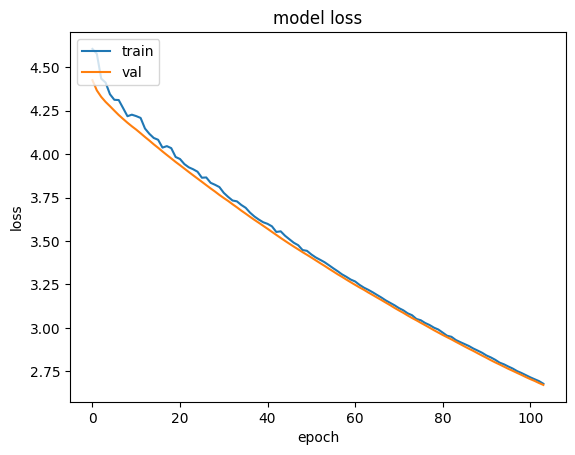

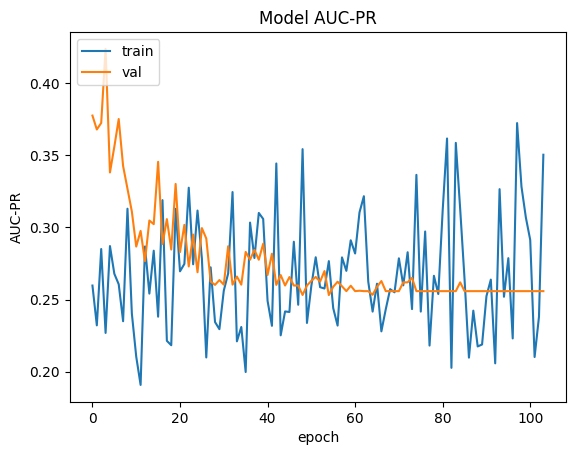

Training on Fold 2/3
Epoch 1/500
15/15 [==============================] - 2s 33ms/step - loss: 4.3878 - auc_1: 0.2717 - val_loss: 4.3625 - val_auc_1: 0.2935
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 4.4438 - auc_1: 0.2292 - val_loss: 4.3371 - val_auc_1: 0.2897
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 4.3416 - auc_1: 0.2560 - val_loss: 4.3119 - val_auc_1: 0.2679
Epoch 4/500
15/15 [==============================] - 0s 10ms/step - loss: 4.3544 - auc_1: 0.2332 - val_loss: 4.2862 - val_auc_1: 0.2796
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 4.3072 - auc_1: 0.2333 - val_loss: 4.2642 - val_auc_1: 0.2503
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 4.2668 - auc_1: 0.2827 - val_loss: 4.2410 - val_auc_1: 0.2080
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 4.2424 - auc_1: 0.2633 - val_loss: 4.2181 - val_auc_1: 0.2037
Epoch 8/500
15/15 [=============

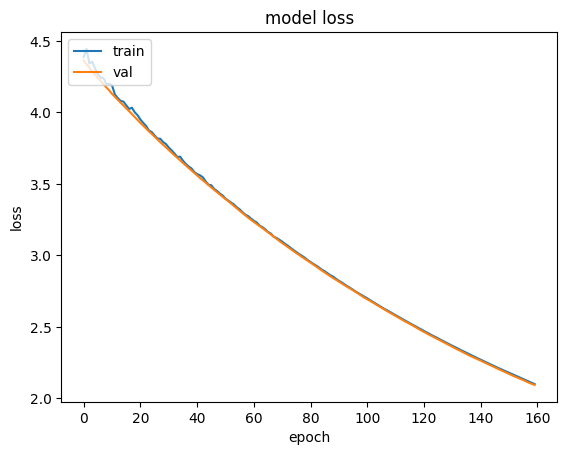

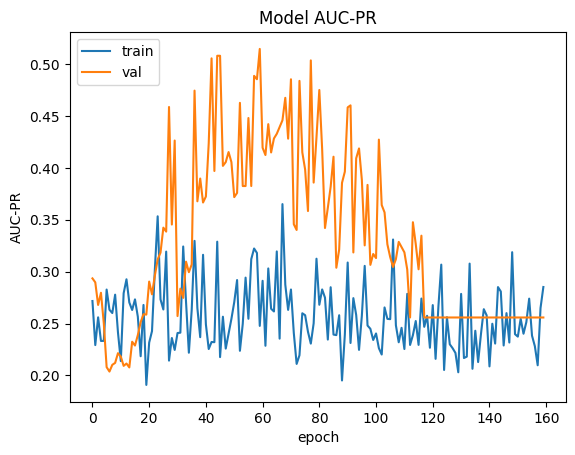

Training on Fold 3/3
Epoch 1/500
15/15 [==============================] - 2s 39ms/step - loss: 4.4234 - auc_2: 0.3130 - val_loss: 4.3936 - val_auc_2: 0.3171
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 4.4635 - auc_2: 0.2532 - val_loss: 4.3631 - val_auc_2: 0.2706
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 4.4180 - auc_2: 0.3070 - val_loss: 4.3351 - val_auc_2: 0.3206
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 4.3833 - auc_2: 0.2491 - val_loss: 4.3110 - val_auc_2: 0.3489
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 4.3624 - auc_2: 0.2394 - val_loss: 4.2868 - val_auc_2: 0.3145
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 4.3082 - auc_2: 0.2623 - val_loss: 4.2631 - val_auc_2: 0.2704
Epoch 7/500
15/15 [==============================] - 0s 12ms/step - loss: 4.3016 - auc_2: 0.2139 - val_loss: 4.2405 - val_auc_2: 0.2711
Epoch 8/500
15/15 [===========

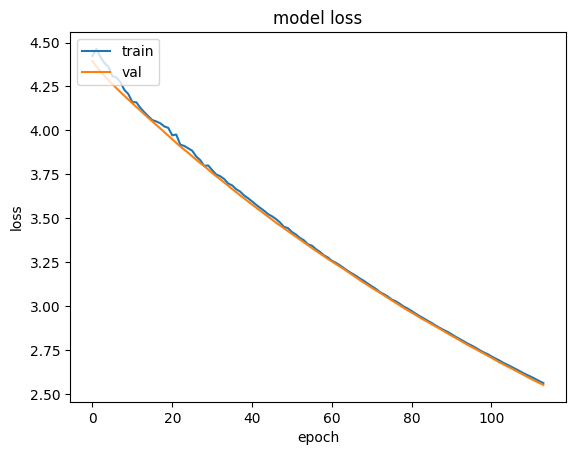

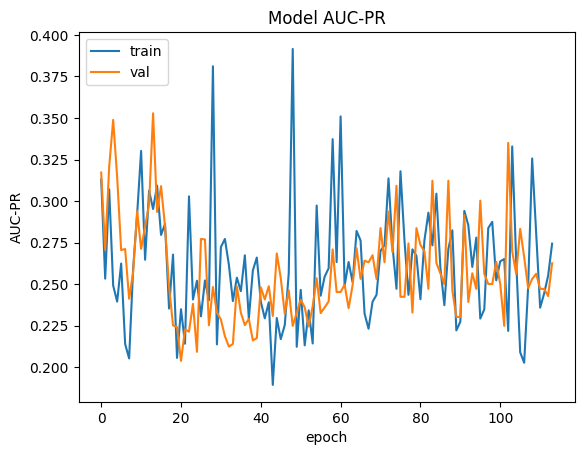

Mean AUC-PR: 0.43038689096768695


In [15]:
num_folds = 3

# Create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

auc_pr_list = []
fold_count = 0

# Iterate over the splits
for train_index, test_index in skf.split(X, y):

  fold_count+=1
  print(f'Training on Fold {fold_count}/{num_folds}')

  #init std scaler to transform univariate features ~N(0,1)
  scaler = StandardScaler()

  # Split the data into training and testing sets
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  # normalizing univarate features in X_train/X_test
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)

  #compute class weights
  class_weights = compute_class_weight(class_weight = "balanced", classes=np.unique(y_train), y=y_train)
  class_weights = {l:c for l,c in zip(np.unique(y_train), class_weights)}

  #define & compile model
  model = Sequential()
  model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

  #handling optimizer
  opt = SGD(learning_rate=0.001, momentum=0.9, decay=1e-6, nesterov=True)

  model.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=[AUC(curve='PR', num_thresholds=1000)])
  
  #init str keys to index into history dictionaries
  if fold_count == 1:
    monitior_key = 'val_auc'
    plt_key = 'auc'
  else:
     monitior_key = 'val_auc_'+str(fold_count-1)
     plt_key = 'auc_'+str(fold_count-1)
  
  #define early stopping on validation AUC-PR
  callback = EarlyStopping(monitor=monitior_key, mode = 'max', patience=100)

  history = model.fit(X_train, y_train, class_weight=class_weights, batch_size=12, epochs=500, validation_data=(X_val, y_val), callbacks=[callback])

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # summarize history for AUC-PR
  plt.plot(history.history[plt_key])
  plt.plot(history.history[monitior_key])
  plt.title('Model AUC-PR')
  plt.ylabel('AUC-PR')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  #update auc-pr log
  auc_pr_list.append(max(history.history[monitior_key]))

print(f'Mean AUC-PR: {np.mean(auc_pr_list)}')

## Train + Test MLP

Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 4.5251
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 4.4853
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 4.4713
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 4.3535
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 4.3400
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 4.2622
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 4.2625
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 4.2220
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 4.1821
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 4.1474
Epoch 11/100
22/22 [==============================] - 0s 3ms/step - loss: 4.0823
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 4.0688
Epoch 13/100
22/22 [=================

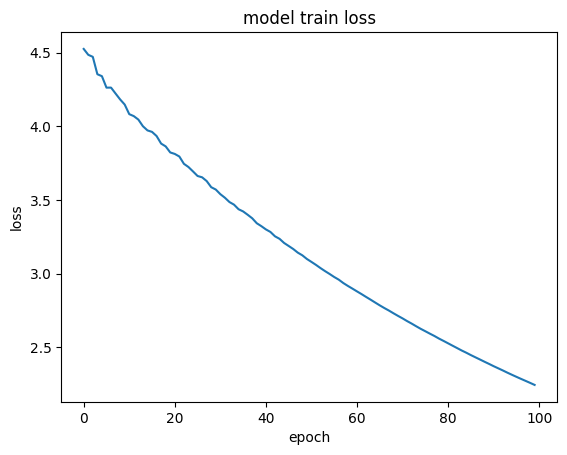

3/3 [==============================] - 0s 4ms/step
Test AUC-PR: 0.4064572505007549


In [16]:
num_epochs = 100

#init std scaler to transform univariate features ~N(0,1)
scaler = StandardScaler()

X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

#compute class weights
class_weights = compute_class_weight(class_weight = "balanced", classes=np.unique(y), y=y)
class_weights = {l:c for l,c in zip(np.unique(y), class_weights)}

#define & compile model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

#handling optimizer
opt = opt = SGD(learning_rate=0.001, momentum=0.9, decay=1e-6, nesterov=False)

model.compile(loss='binary_crossentropy', 
              optimizer=opt)

history = model.fit(X_train, y, class_weight=class_weights, batch_size=12, epochs=num_epochs)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#get test AUC-PR
probs = model.predict(X_test)
test_auc_pr = average_precision_score(y_test, probs)
print(f'Test AUC-PR: {test_auc_pr}')

## Investigating Feature Importance

In [17]:
from sklearn.inspection import permutation_importance

In [18]:
features = list(train_data_verbose_df.columns)
features = features[1:-1]
features

['FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr']

In [19]:
def shuffle_data_matrix(data_matrix, column_index):
  #shuffles passed data matrix column in place
  np.random.shuffle(data_matrix.T[column_index])

In [20]:
num_repeats = 20

features_dict = {}

for feature_ind in range(len(features)):

  feature = features[feature_ind]

  features_dict[feature] = []

  for iter in range(num_repeats):

    #copy test data matrix and shuffle spcified feature column
    permute_test_data_matrix = X_test.copy()
    shuffle_data_matrix(permute_test_data_matrix, feature_ind)

    #test model on shuffled data
    permute_probs = model.predict(permute_test_data_matrix)
    permute_auc_pr = average_precision_score(y_test, permute_probs)

    #compute accuracy decrease
    auc_pr_decrease = test_auc_pr - permute_auc_pr

    #append to list of auc_pr decreases for this feature
    features_dict[feature].append(auc_pr_decrease)

3/3 [==============================] - 0s 3ms/step


In [21]:
permute_auc_pr_df = pd.DataFrame(features_dict)

n = 5  # Number of columns to keep

# Compute the mean values for each column
column_means = permute_auc_pr_df.mean()

# Sort the mean values in ascending order
sorted_columns = column_means.sort_values()

# Select the first n columns with the lowest mean values
columns_to_keep = sorted_columns.index[-n:]

# Create a new DataFrame with only the selected columns
permute_auc_pr_df_critical_features = permute_auc_pr_df[columns_to_keep]

permute_auc_pr_df_critical_features

,FTr,3PAr,BLK,FG%,eFG%
0,0.058101,-0.007986,-0.036284,0.050738,0.095577
1,0.015556,0.001718,0.078207,0.031133,0.102351
2,0.016613,-0.005804,0.043112,0.079951,0.154877
3,0.014879,-0.007790,0.009236,0.052352,0.134082
4,-0.013316,0.049814,-0.011688,0.041687,0.108414
5,-0.007797,0.023770,0.046998,0.013399,0.045055
6,0.032264,0.042416,-0.012945,0.080683,0.138106
7,0.029219,0.044842,-0.001732,0.068416,0.053119
8,-0.004936,0.037368,-0.036902,0.033858,0.117528
9,-0.022541,-0.003881,0.003215,0.069230,0.115478


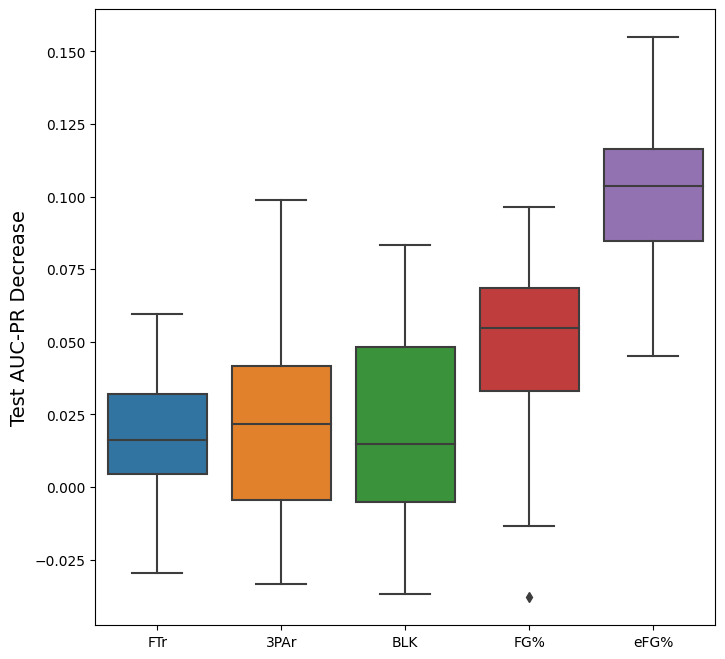

In [22]:
plt.figure(figsize=(8,8))
plt.ylabel('Y Label', fontsize=14)

sns.boxplot(data=permute_auc_pr_df_critical_features)

plt.ylabel('Test AUC-PR Decrease')
plt.show()